In [1]:
import pandas as pd
import numpy as np

In [ ]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -5.25
df = 58  # Replace this with your specific degrees of freedom

# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value*2)

2.256369746933224e-06


In [ ]:
# The Shapiro-Wilk test returns two values: the test statistic (W) and the p-value.
# If the p-value is greater than your chosen significance level (α = 0.05),
# you can assume the data comes from a normally distributed population.
# If the p-value is less than or equal to the significance level, the normality assumption is not met,
# and you should consider applying a data transformation or using a non-parametric test like the Mann-Whitney U test.


from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile)


Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783114194869995, pvalue=0.7790969014167786)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714356064796448, pvalue=0.5791608691215515)


In [ ]:
# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the assumption of equal variances is not met,
# and you should consider using Welch's t-test instead of the regular independent two-sample t-test.

from scipy.stats import levene

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)


LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)


# 1 Sample T-test

In [14]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
pop = final_df['Age'].dropna()

In [16]:
pop.mean()

29.643234375

In [17]:
sample_age = pop.sample(25).values

In [18]:
sample_age

array([20. , 47. , 46. , 34. , 34.5,  8. , 17. , 42. , 30. , 31. , 50. ,
       18. ,  4. , 37. , 34. , 32. ,  2. , 28. ,  9. ,  3. , 38. , 24. ,
       26. , 42. , 22. ])

In [19]:
# H0 -> The mean age is 35
# H1 -> The mean is less than 35

In [20]:
# check for normality using Shapiro Wilk test
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)

print(shapiro_age)

ShapiroResult(statistic=0.9545550346374512, pvalue=0.31670302152633667)


In [21]:
pop_mean = 35

In [22]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(sample_age, pop_mean)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: -2.765777383085527
p-value: 0.005374401567971943


In [23]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


# 2 Sample T-Test

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
final_df = df.sample(800)

In [5]:
pop_male = final_df[final_df['Sex'] == 'male']['Age'].dropna()
pop_female = final_df[final_df['Sex'] == 'female']['Age'].dropna()

In [6]:
sample_male = pop_male.sample(25)
sample_female = pop_female.sample(25)

alpha = 0.05

In [7]:
# H0 - Mean age of male and female are similar
# H1 - Mean age of male is higher than female

In [8]:
pop_male.mean()

30.952389162561577

In [9]:
pop_female.mean()

27.371794871794872

In [10]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print("Shapiro-Wilk test for desktop users:", shapiro_male)
print("Shapiro-Wilk test for mobile users:", shapiro_female)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9262849688529968, pvalue=0.07135824114084244)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9514151811599731, pvalue=0.26976844668388367)


In [11]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

LeveneResult(statistic=0.014261391168518094, pvalue=0.9054401973897633)


In [12]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: -0.1277023795952148
p-value: 0.4494590115695623


In [13]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


# Pair Sample T-Test

In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])


In [25]:
differences = after - before

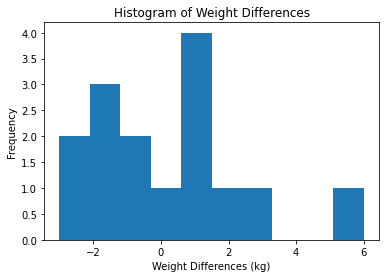

Shapiro-Wilk test: ShapiroResult(statistic=0.9220570921897888, pvalue=0.20704729855060577)


In [26]:
plt.hist(differences)
plt.title("Histogram of Weight Differences")
plt.xlabel("Weight Differences (kg)")
plt.ylabel("Frequency")
plt.show()

shapiro_test = stats.shapiro(differences)
print("Shapiro-Wilk test:", shapiro_test)


In [27]:
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

In [28]:
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))
df = n - 1

In [29]:
t_statistic

0.10482848367219182

In [30]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)

In [ ]:
p_value

0.5410005146857456

In [31]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.
